# Downloads, crops and plot the TRMM Rainfall averages image for the last 30 days

[Nicolas Fauchereau](mailto:Nicolas.Fauchereau@niwa.co.nz)

In [1]:
%matplotlib inline

### imports the modules needed

In [2]:
import os, sys
from datetime import datetime, timedelta
from StringIO import StringIO
import requests
from PIL import Image
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

### defines the plotting function

In [3]:
def plot_trmm_from_images(img_arr, cbar_arr, paths, date):
    fig = plt.figure(figsize=(9.1,4.9))
    ax = fig.add_axes([0.03,0.05,0.95,0.9])

    ### date formatted 
    fdate = date.strftime('%Y-%m-%d')

    curr_map = Basemap(projection='cyl', llcrnrlon=ll_lon, llcrnrlat=ll_lat, urcrnrlon=ur_lon, urcrnrlat=ur_lat,\
                       resolution='h', ax=ax, area_thresh=10.)

    curr_map.imshow(img_arr,interpolation='bilinear', origin='upper')

    curr_map.drawcoastlines(linewidth=1.,color='k')
    #draw parallels and meridians.
    delat = 10.
    circles = np.arange(ll_lat,ur_lat + delat, delat)
    curr_map.drawparallels(circles, labels=[1,0,0,0], fontsize=14, linewidth=0.8, color='k')
    delon = 10.
    meridians = np.arange(ll_lon,ur_lon, delon)
    curr_map.drawmeridians(meridians, labels=[0,0,0,1], fontsize=14, linewidth=0.8, color='k')
    plt.title("TRMM rainfall average for last 30 days ending %s" % (fdate))

    ### now load the colorbar image
    ax2 = fig.add_axes([0.61,-0.08,0.32,0.32], frameon=False)
    ### take the last 60 pixels (image originally 673 x 138)
    ax2.imshow(cbar_arr[-60:,:,:])
    plt.setp(ax2,xticks=[])
    plt.setp(ax2,yticks=[])

    for p in paths:
        plt.savefig(os.path.join(p,'TRMM_last30days_average_{}'.format(fdate)), dpi=200)

### defines the paths to save the figure

In [4]:
dpaths = [os.path.join(os.environ['HOME'],'drives/auck_projects/ICU14101/Working/TRMM_KMLS/real_time'),
os.path.join(os.environ['HOME'], 'operational/ICU/TRMM_KMLS/SP')]

### defines the proxies (if needed)

In [5]:
proxies = {}
# proxies['http'] = 'http://proxy:port'

### date of today (UTC) - 1 day

In [6]:
date = datetime.now() - timedelta(days=1)

### definitions lat / lon

In [7]:
nlat = 400
nlon = 1440

### create lat and lon vectors
lon = np.arange(0.125, 0.125 + nlon * 0.25, 0.25) 
lat = np.arange(49.875, 49.875 - nlat * 0.25, -0.25)

### set the domain we want [lonW, lonE, latS, latN]
ll_lon, ur_lon, ll_lat, ur_lat = [135., 240., -50., 10.]

### defines URL, and streams the content

In [8]:
base_url = "http://trmm.gsfc.nasa.gov/trmm_rain/Events/"

In [9]:
r = requests.get(base_url + 'tafd_latest_google_earth_average.png', proxies=proxies)
img = Image.open(StringIO(r.content))
img_arr = np.array(img)

r = requests.get(base_url + 'tafd_30day_avg_wedge_google_wedge.png', proxies=proxies)
cbar = Image.open(StringIO(r.content))
cbar_arr = np.array(cbar)

### select domain 

In [10]:
ilon = np.where( (lon >= ll_lon) & (lon <= ur_lon) )[0]
ilat = np.where( (lat >= ll_lat) & (lat <= ur_lat) )[0]

img_arr = np.take(np.take(img_arr,ilat,axis=0),ilon,axis=1)

img_arr[:,:,-1] = 255 # get rid of the transparency

### plots and saves the map

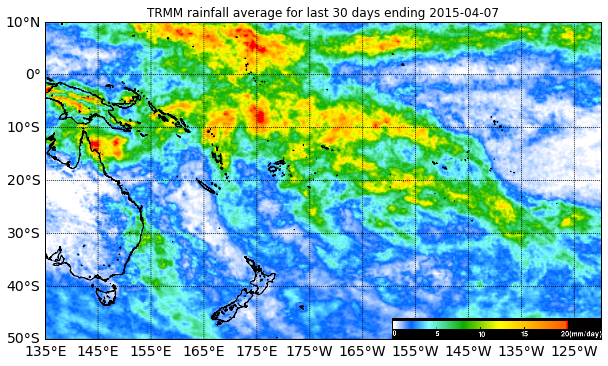

In [11]:
plot_trmm_from_images(img_arr, cbar_arr, dpaths, date)